In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [86]:
def feature_detect(image_path):
    
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mouth.xml')
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    eyes=eyes_cascade.detectMultiScale(gray,scaleFactor=1.5,minNeighbors=8,minSize=(30,30))
    mouth=mouth_cascade.detectMultiScale(gray,scaleFactor=1.5,minNeighbors=6,minSize=(50,30))
    return eyes, mouth

In [87]:
def select_random(user_input):
    numbers=random.sample(range(1,115),user_input)
    return numbers

Input the number of images to check (Max=114) : 10
We have tested total : 10 random images 


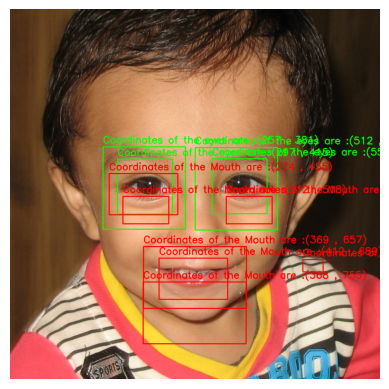

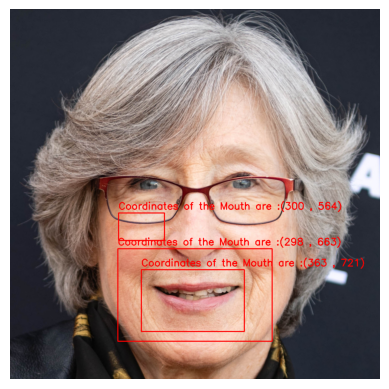

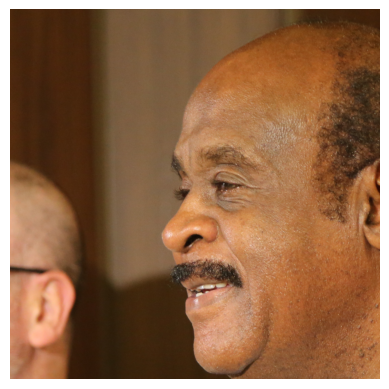

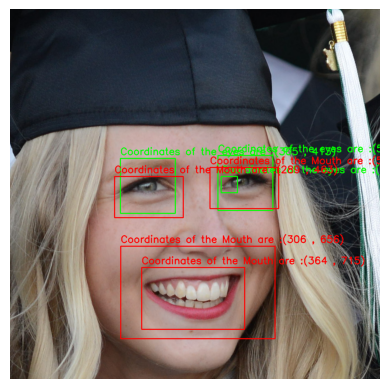

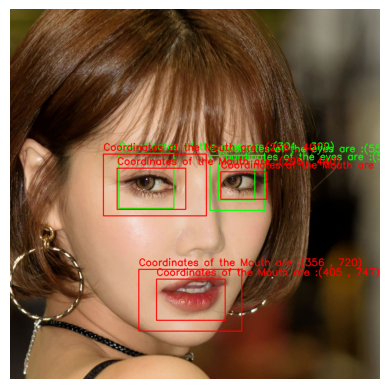

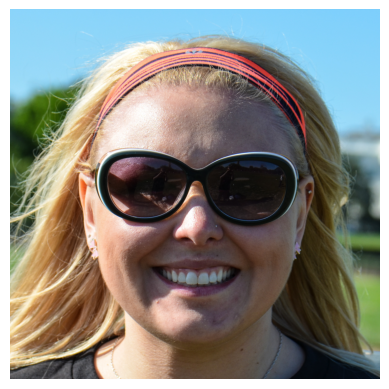

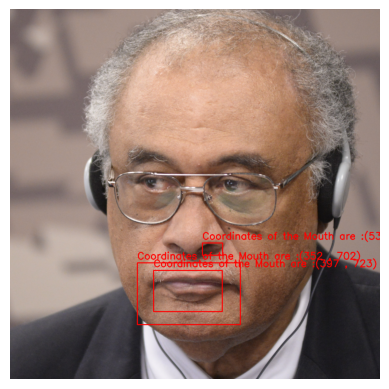

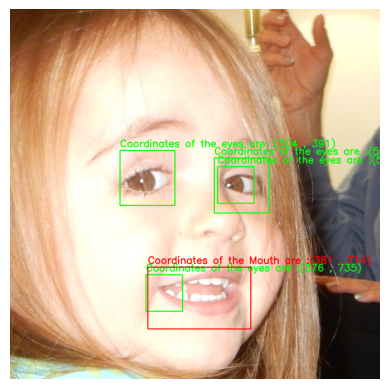

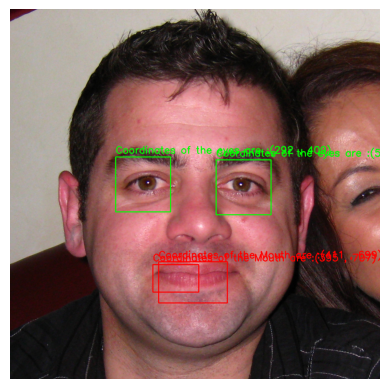

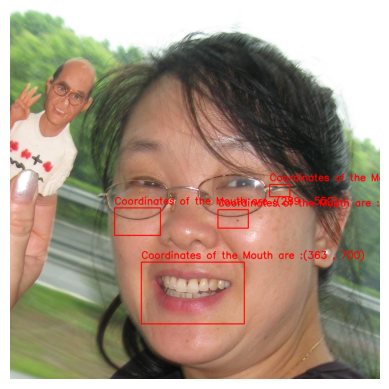

In [94]:
user_input=1
user_input=int(input("Input the number of images to check (Max=114) : "))
random_images = select_random(user_input)
print(f"We have tested total : {user_input} random images ")
for images in random_images:
    formatted_name = str(images).zfill(5)
    image_path=f"skids/ffhq-dataset/dataset/{formatted_name}.png"
    eyes, mouth=feature_detect(image_path)
    image=cv2.imread(image_path)
    
    for (x,y,w,h) in eyes:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

        cv2.putText(image,f"Coordinates of the eyes are :({x} , {y})",(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2)
    for (x,y,w,h) in mouth:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(image,f"Coordinates of the Mouth are :({x} , {y})",(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,0,255),2)
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()   
